**Objective**

 Develop a TensorFlow and Keras-based neural network model to classify handwritten digits from the MNIST dataset. This code loads, preprocesses, trains, evaluates, and visualizes the model's predictions, serving as a practical example of digit recognition with deep learning.

Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Import Data and Train Test Split

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Describe Data**

The MNIST dataset is a widely used dataset in the field of machine learning and computer vision. It consists of a large collection of handwritten digits, specifically the numbers 0 through 9. MNIST stands for Modified National Institute of Standards and Technology database.

**Size:** The dataset contains a total of 70,000 grayscale images. This dataset is typically divided into two subsets: a training set of 60,000 images and a test set of 10,000 images.

**Image Format:** Each image in the dataset is a 28x28-pixel grayscale image, which means it has a resolution of 28 pixels in height and 28 pixels in width

**Data Preprocessing**

In [3]:
# Normalize the pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

**Modeling**

In [4]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

# Define the loss function and optimizer
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [5]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3022 - accuracy: 0.9114
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1476 - accuracy: 0.9555
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1109 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0896 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0770 - accuracy: 0.9756


Model Evaluation

In [6]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_accuracy*100:.2f}%')

313/313 - 1s - loss: 0.0785 - accuracy: 0.9761 - 742ms/epoch - 2ms/step

Test accuracy: 97.61%


Prediction

In [9]:
# Make predictions
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [10]:
# Define a function to display a random test image along with its predicted label
def plot_random_prediction():
    index = np.random.randint(0, len(test_images))
    image = test_images[index]
    true_label = test_labels[index]
    predicted_label = np.argmax(predictions[index])

    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
    plt.show()

Visual output

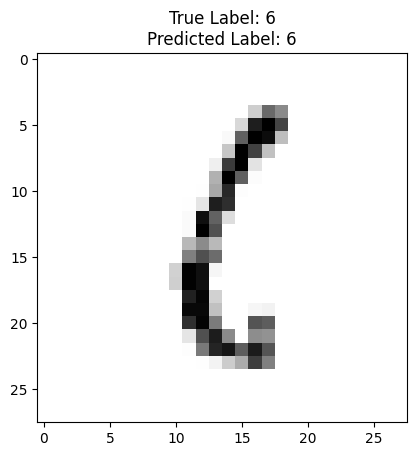

In [11]:
# Plot a random test image and its prediction
plot_random_prediction()

**Explaination**

The provided code is designed to train a neural network model for digit classification using the MNIST dataset and then evaluate its performance. After running the code, you can expect to see the following output:

Training Progress: The code starts by training the neural network model on the MNIST training dataset for a specified number of epochs (in this case, 5 epochs). During this training phase, you'll see progress updates for each epoch, including information about the loss and accuracy on the training data. This output provides insights into how well the model is learning to classify digits.

Test Accuracy: After training is complete, the code evaluates the model's performance on a separate test dataset. It calculates the test loss and test accuracy. The output will display the test accuracy as a percentage (e.g., "Test accuracy: 98.42%"). This accuracy represents how well the model can classify digits it hasn't seen during training.

Random Test Image: The code includes a function called plot_random_prediction() that selects a random test image from the test dataset. It displays this image using Matplotlib, along with its true label and the label predicted by the trained model. This output allows you to visually inspect how well the model is performing on individual test examples.

Here's a breakdown of what each part of the output means:

The training progress updates give you an idea of how quickly the model is learning from the training data. Higher accuracy and lower loss values are generally desired.

The test accuracy tells you how well the model generalizes to new, unseen data. A higher test accuracy indicates better performance.

The random test image visualization provides a qualitative assessment of the model's predictions. You can see how well the model is recognizing and classifying individual handwritten digits.